In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [123]:
szum1 = pd.read_csv('szum1.txt', sep=",", decimal=".", header=None)
szum2 = pd.read_csv('szum2.txt', sep=",", decimal=".", header=None)
light = pd.read_csv('anomalia_light.txt', sep=",", decimal=".", header=None)
dark = pd.read_csv('anomalia_dark.txt', sep=",", decimal=".", header=None)

In [124]:
columns = ['Nr_class','Nr_sample','Time', 'Sensor_1_value']
szum1['Nr_class'] = [0 for i in range(len(szum1))] 
szum2['Nr_class'] = [0 for i in range(len(szum2))] 
light['Nr_class'] = [1 for i in range(len(light))] 
dark['Nr_class'] = [2 for i in range(len(dark))] 

szum2['Nr_sample'] = [1 for i in range(len(szum2))] 
szum1['Nr_sample'] = [2 for i in range(len(szum1))] 
light['Nr_sample'] = [1 for i in range(len(light))]
dark['Nr_sample'] = [1 for i in range(len(dark))]

new = szum1[0].str.split("\t", n=1, expand=True)
szum1['Time'] = new[0]
szum1['Sensor_1_value'] = new[1]
szum1 = szum1[['Nr_class','Nr_sample','Time', 'Sensor_1_value']]
szum1.columns = columns

new = szum2[0].str.split("\t", n=1, expand=True)
szum2['Time'] = new[0]
szum2['Sensor_1_value'] = new[1]
szum2 = szum2[['Nr_class','Nr_sample','Time', 'Sensor_1_value']]
szum1.columns = columns
szum2.columns = columns

new = light[0].str.split("\t", n=1, expand=True)
light['Time'] = new[0]
light['Sensor_1_value'] = new[1]
light = light[['Nr_class','Nr_sample','Time', 'Sensor_1_value']]
light.columns = columns

dark['Time'] = [0 for i in range(len(dark))]
dark['Sensor_1_value'] = dark[0]
dark = dark[['Nr_class','Nr_sample','Time', 'Sensor_1_value']]

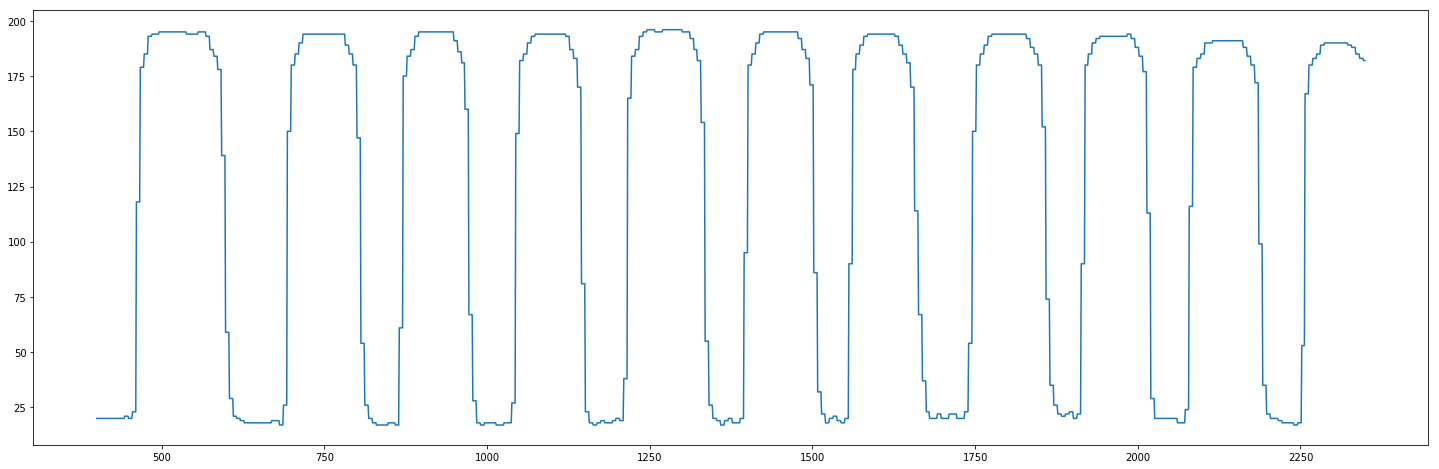

In [125]:
fig=plt.figure(figsize=(25, 8))
dark = dark[400:2350]
dark['Sensor_1_value'].plot()


In [150]:
dark['Sensor_1_value'][100:101]>30

500    True
Name: Sensor_1_value, dtype: bool

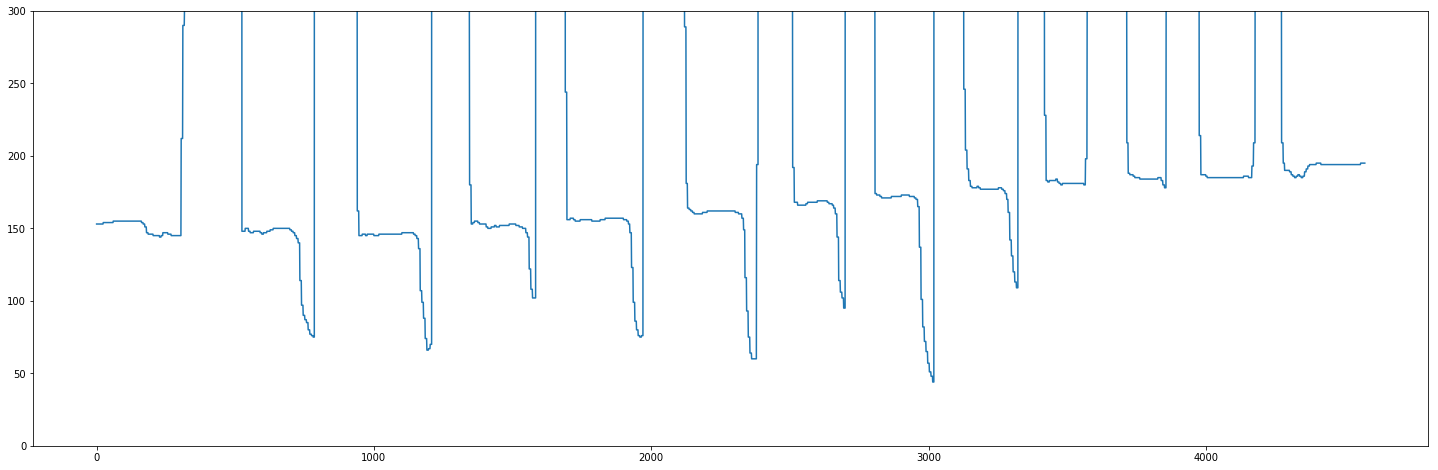

In [206]:
fig=plt.figure(figsize=(25, 8))
light['Sensor_1_value'].astype(float).plot(ylim=(0,300))

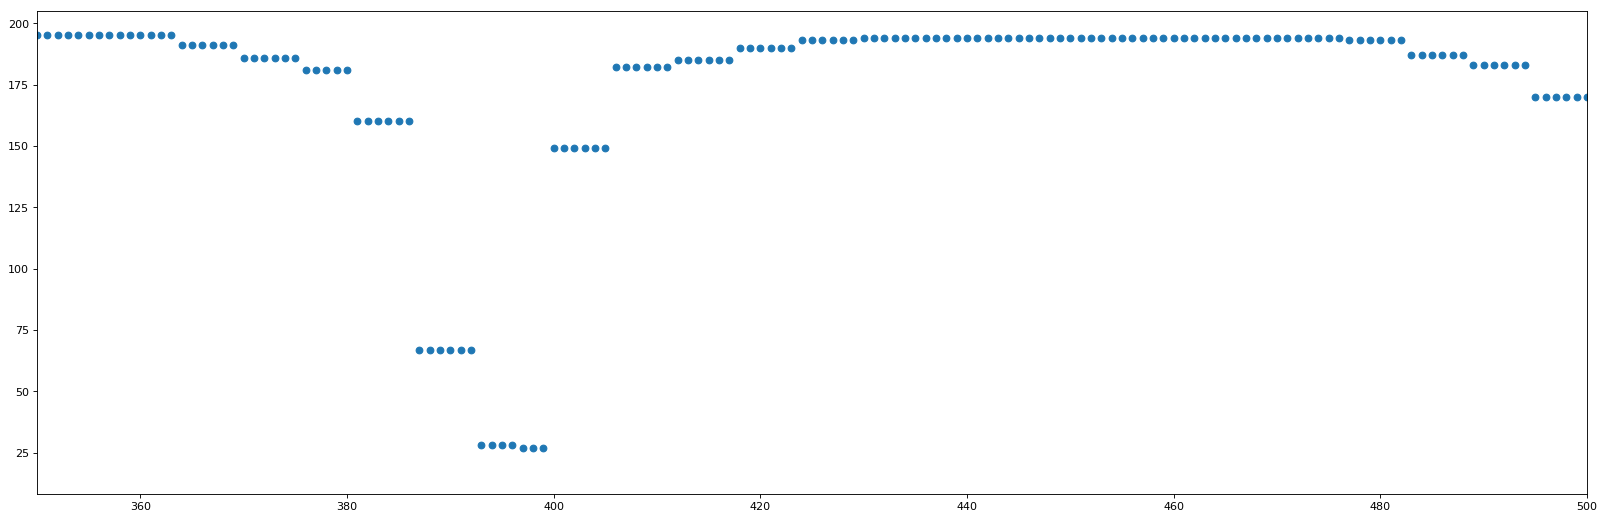

In [193]:
def process(data):
    Nr_sample = []
    nr_sample=0
    time = []
    value_x = []
    measure = []
    j=1
    boola = False #górka
    for i in range(1,len(data)):
        if int(data['Sensor_1_value'][i:i+1])>=30 and boola == False:
                time.append(data['Time'][i-3:i-2])
                value_x.append(int(data['Sensor_1_value'][i-3:i-2]))
                time.append(data['Time'][i-2:i-1])
                value_x.append(int(data['Sensor_1_value'][i-2:i-1]))
                time.append(data['Time'][i-1:i])
                value_x.append(int(data['Sensor_1_value'][i-1:i]))
                time.append(data['Time'][i:i+1])
                value_x.append(int(data['Sensor_1_value'][i:i+1]))
                measure.append(j)
                j+=1
                measure.append(j)
                j+=1
                measure.append(j)
                j+=1
                measure.append(j)
                j+=1
                
                nr_sample+=1
                Nr_sample.append(nr_sample)
                Nr_sample.append(nr_sample)
                Nr_sample.append(nr_sample)
                Nr_sample.append(nr_sample)
                boola = True
                
        elif int(data['Sensor_1_value'][i:i+1] >= 30) and boola==True:
#              or int(data['Sensor_1_value'][i+1:i+2]) or int(data['Sensor_1_value'][i+2:i+3]) or \
#             int(data['Sensor_1_value'][i+3:i+4]) ):
                                                      
                Nr_sample.append(nr_sample)
                time.append(data['Time'][i:i+1])
                value_x.append(int(data['Sensor_1_value'][i:i+1]))                    
                measure.append(j)
                j+=1                                                                            
                
        elif int(data['Sensor_1_value'][i:i+1] <= 30) and boola==True and \
            ( int(data['Sensor_1_value'][i-4:i-3]) >=30 or int(data['Sensor_1_value'][i-3:i-2]) >=30 or\
             int(data['Sensor_1_value'][i-2:i-1])>=30 or int(data['Sensor_1_value'][i-1:i])>=30) :
#              or int(data['Sensor_1_value'][i+1:i+2]) or int(data['Sensor_1_value'][i+2:i+3]) or \
#             int(data['Sensor_1_value'][i+3:i+4]) ):
                                                      
                Nr_sample.append(nr_sample)
                time.append(data['Time'][i:i+1])
                value_x.append(int(data['Sensor_1_value'][i:i+1]))                    
                measure.append(j)
                j+=1                                                                            

        elif int(data['Sensor_1_value'][i:i+1]) <=30 and boola==True:
            boola = False
        else:
            pass    
                                                      
    return measure, Nr_sample, time, value_x
                    
measure, Nr_sample, time, value_x = process(light)
fig=plt.figure(figsize=(25, 8), dpi= 80)
plt.xlim(350, 500)
plt.scatter(measure, value_x)                

In [197]:
dark_proc = pd.DataFrame(columns=columns)
dark_proc['Nr_class'] = [2 for i in range(len(Nr_sample))]
dark_proc['Nr_sample'] = Nr_sample
dark_proc['Time'] = [0 for i in range(len(dark_proc))]
dark_proc['Sensor_1_value'] = value_x
dark_proc.head()

,Nr_class,Nr_sample,Time,Sensor_1_value
0,2,1,0,23
1,2,1,0,23
2,2,1,0,23
3,2,1,0,118
4,2,1,0,118


In [199]:
dark_proc[dark_proc['Nr_sample']==1].tail(10)

,Nr_class,Nr_sample,Time,Sensor_1_value
140,2,1,0,59
141,2,1,0,59
142,2,1,0,59
143,2,1,0,59
144,2,1,0,59
145,2,1,0,59
146,2,1,0,29
147,2,1,0,29
148,2,1,0,29
149,2,1,0,29


In [200]:
dark_proc[dark_proc['Nr_sample']==1].head(10)

,Nr_class,Nr_sample,Time,Sensor_1_value
0,2,1,0,23
1,2,1,0,23
2,2,1,0,23
3,2,1,0,118
4,2,1,0,118
5,2,1,0,118
6,2,1,0,118
7,2,1,0,118
8,2,1,0,118
9,2,1,0,179


In [201]:
dark_proc.to_csv("dark_proc.csv")

In [ ]:
frames = [szum1, szum2, dark_proc, light_proc]
result = pd.concat(frames)
result.head()

In [207]:
szum1

,Nr_class,Nr_sample,Time,Sensor_1_value
0,0,2,2019-08-22 18:09:01,59
1,0,2,2019-08-22 18:09:01,59
2,0,2,2019-08-22 18:09:01,59
3,0,2,2019-08-22 18:09:01,59
4,0,2,2019-08-22 18:09:01,59
5,0,2,2019-08-22 18:09:01,59
6,0,2,2019-08-22 18:09:01,59
7,0,2,2019-08-22 18:09:01,59
8,0,2,2019-08-22 18:09:01,59
9,0,2,2019-08-22 18:09:01,59
